In [1]:
%load_ext autoreload
%autoreload 2 # turn off autoreload by importing with aimport
%matplotlib inline
import matplotlib.style as style

import matplotlib.pyplot as plt
import numpy as np
import time
from tqdm import tqdm

style.use('default')
plt.rcParams['figure.figsize'] = [6,4]

In [2]:
import subprocess
process = subprocess.Popen('which python'.split(), stdout=subprocess.PIPE)
output, error = process.communicate()
print(output)

b'/home/slab/anaconda3/envs/qiskit_metal/bin/python\n'


In [3]:
import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, open_docs

from qiskit_metal.qlibrary.qubits.transmon_pocket_teeth import TransmonPocketTeeth
from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander

In [4]:
design = designs.DesignPlanar()
design.overwrite_enabled = True # good for re-running cells in nb

In [5]:
gui = MetalGUI(design)

05:30PM 15s CRITICAL [_qt_message_handler]: line: 0, func: None(), file: None  WARNING: QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-slab'



In [6]:
chip_options = dict(
    size_x='7mm',
    size_y='7mm',
    center_x='3.5mm',
    center_y='3.5mm',
)
design.chips.main.size.update(chip_options)

In [12]:
# From https://qiskit.org/documentation/metal/tut/2-From-components-to-chip/2.21-Design-a-4-qubit-full-chip.html
def connect(
    cpw_name: str, pin1_comp_name: str, pin1_comp_pin: str,
    pin2_comp_name: str, pin2_comp_pin: str, length: str,
    cpw_options= Dict()):
    """Connect two pins with a CPW."""
    myoptions = Dict(
        pin_inputs=Dict(
            start_pin=Dict(
                component=pin1_comp_name,
                pin=pin1_comp_pin),
            end_pin=Dict(
                component=pin2_comp_name,
                pin=pin2_comp_pin)),
        total_length=length)
    myoptions.update(cpw_options)
    return RouteMeander(design, cpw_name, myoptions)

In [31]:
transmon_options = dict(
    # layer=3,
    orientation=180,
    pos_x='2000um',
    pos_y='4000um',
    pad_gap='70um',
    pad_width='840um',
    pad_height='120um',
    pocket_width='1220um',
    pocket_height='800um',
    coupled_pad_gap='100um',
    coupled_pad_width='30um',
    coupled_pad_height='195um',
    connection_pads=dict(
        a = dict(
            pad_gap='30um',
            pad_width='40um',
            pad_height='170um',
            cpw_width='12um',
            cpw_gap='5um',
            # needs to be placed in the correct loc for teeth to show up
            loc_W=0,
            loc_H=+1,
        )
    ),
    gds_cell_name='FakeJunction_01',
)
q1 = TransmonPocketTeeth(design, 'q1', options=transmon_options)

p1_options = dict(
    pos_x='5000um',
    pos_y='2000um',
    orientation=90,
    pad_width='300um',
    pad_height='400um',
    pad_gap='160um',
    taper_height='400um',
)
p1 = LaunchpadWirebond(design, 'p1', options=p1_options)

cpw_options = dict(
    # lead=Dict(
    #     start_straight='150um',
    #     end_straight='150um'
    # ),
    fillet='200um',
    meander=dict(
        spacing='700um',
    )
)
cpw1 = connect('cpw1', 'q1', 'a', 'p1', 'tie', '25mm', cpw_options=cpw_options)

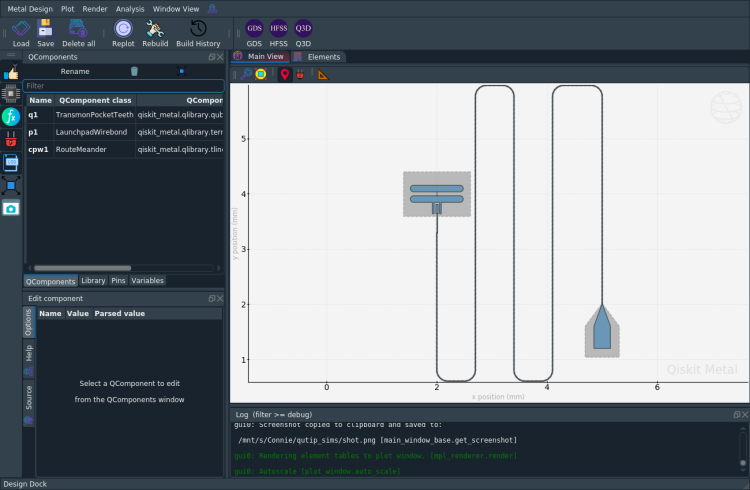

In [32]:
gui.rebuild()
gui.autoscale()
gui.screenshot()

In [33]:
design_gds = design.renderers.gds
design_gds.options['path_filename'] = '../qiskit-metal/tutorials/resources/Fake_Junctions.GDS'
design_gds.options['no cheese']['buffer'] = '50um'
design_gds.options['junction_pad_overlap'] = '0.13um'

design_gds.export_to_gds('../DXF/designs/hamburgermon_qiskit.gds')

1

In [34]:
design_hfss = design.renderers.hfss

In [11]:
design.renderers

{'hfss': <qiskit_metal.renderers.renderer_ansys.hfss_renderer.QHFSSRenderer at 0x7f3046aec310>,
 'q3d': <qiskit_metal.renderers.renderer_ansys.q3d_renderer.QQ3DRenderer at 0x7f30af9e2370>,
 'gds': <qiskit_metal.renderers.renderer_gds.gds_renderer.QGDSRenderer at 0x7f3046a9fc10>}